# Homework 2 

# Preprocessing the data

To begin the preprocessing ,we first input data.

In [1]:
import pandas as pd
banktemp=pd.read_csv('E:\\bank.csv',sep=';')

To simplify the procedure, I choose two feature in the beginning. And also check whether there are missing data in our dataset.  

In [2]:
import numpy as np
bank=banktemp.loc[:,['age','balance','y']]
bank.isnull().sum() 

age        0
balance    0
y          0
dtype: int64

As we can see, there are two nominal variable 'y'. Therefore, I use the map code to mapping ordinal features.

In [3]:
y_mapping={'no':0,'yes':1}
bank['y']=bank['y'].map(y_mapping)

Here, I seperate the train and test data, and assign 30% of the samples to x_test and y_test.

In [9]:
from sklearn.model_selection import train_test_split
X=bank.iloc[:,[0,1]]
y=bank.iloc[:,2]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123,stratify=y)
X_train,X_test,y_train,y_test

(      age  balance
 4473   33     4790
 844    40       65
 191    33      215
 132    43     -715
 3856   42       83
 1516   29      242
 775    37      168
 843    59      671
 2835   37      489
 3906   51      844
 1453   30      518
 206    42     2030
 3329   34    13204
 403    48     -285
 1761   35      251
 3429   41     7735
 4062   43      109
 2645   33     3074
 4179   34     -566
 2255   36     1531
 2822   38      170
 734    28       26
 2979   56      359
 1514   32      167
 2136   34        0
 194    23     9216
 2955   49    12531
 199    75     3771
 165    31     2104
 2796   56     1270
 ...   ...      ...
 473    61     4608
 2561   35        0
 184    34      -62
 947    40      888
 2597   35     -587
 696    41     6000
 1038   41      176
 4071   28       12
 1925   33        0
 1160   38      157
 4180   33      210
 2772   48      414
 1643   29      330
 2578   42        0
 1018   55      466
 2906   34        0
 705    35     1354
 4311   46     1790


Then, except for decision trees and random forests, all other algorithms need us to normalize the data,and bring features onto the same scale.

In [22]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.fit_transform(X_test)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Modeling class probabilities via logistic regression

Implement a small convenience function to visualize the decision boundaries for two-dimensional datasets.

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Use the logistic regression and show the accuracy score.

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=1)  
lr.fit(X_train_norm, y_train)
from sklearn.metrics import accuracy_score
y_score=accuracy_score(y_test,lr.predict(X_test_norm))
print('Accuracy: %.4f' % y_score)

Accuracy: 0.8850


Visualize the outcome.

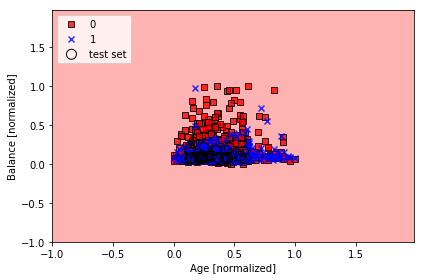

In [13]:
X_combined_norm = np.vstack((X_train_norm, X_test_norm))
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_norm, y_combined,classifier=lr,test_idx=range(105, 150))
plt.xlabel('Age [normalized]')
plt.ylabel('Balance [normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Maximum margin classification with support vector machines

Processing SVM model and give the accuracy of SVM. The kernel is rbf since the data are linear inseperable. 

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
y_score_svm=accuracy_score(y_test,lr.predict(X_test_norm))
print('Accuracy: %.4f' % y_score_svm)

Accuracy: 0.8850


Visualize the outcome of SVM.

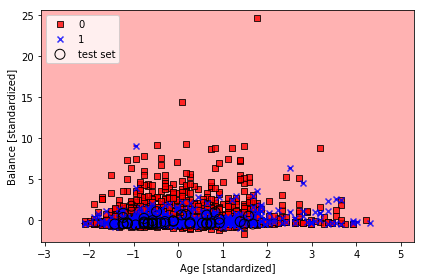

In [15]:
plot_decision_regions(X_combined_std, y_combined,classifier=svm, test_idx=range(105, 150))
plt.xlabel('Age [standardized]')
plt.ylabel('Balance [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree Learning

Building a decesion tree and evaluate the accuracy score.

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train_norm, y_train)
y_score_tree=accuracy_score(y_test,tree.predict(X_test_norm))
print('Accuracy: %.4f' % y_score_tree)

Accuracy: 0.8799


Visualize the decesion tree.

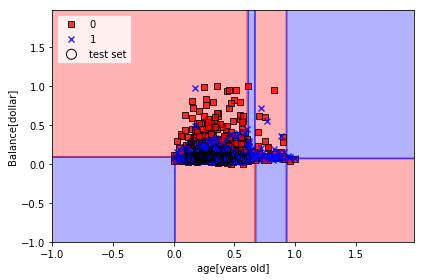

In [29]:
X_combined = np.vstack((X_train_norm, X_test_norm))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,classifier=tree, test_idx=range(105, 150))

plt.xlabel('age[years old]')
plt.ylabel('Balance[dollar]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()